# ✈️ Flight Delay Dataset Description

This dataset contains information about flight delays at various airports, including the causes of delays and cancellations.

---

## 📅 Date Information
- **year**: Year the data was recorded.
- **month**: Month number (12).

## 🛫 Carrier Information
- **carrier_code**: Two-letter airline carrier code.
- **carrier_name**: Full name of the airline carrier.

## 🛬 Airport Information
- **airport_code**: Code of the airport (e.g., ATL for Atlanta).
- **airport_name**: Full name of the airport.

## 📊 Flight Statistics
- **arrival_flights**: Total number of flights arriving at the airport.
- **arrival_cancelled_count**: Number of cancelled arriving flights.
- **arrival_diverted_count**: Number of arriving flights that were diverted.
- **arrival_delay_over_15min**: Number of arriving flights delayed by more than 15 minutes.

## 🕒 Delay Cause Counts (Number of Flights Delayed)
- **carrier_delay_count**: Flights delayed due to airline/carrier issues (e.g., crew shortage).
- **weather_delay_count**: Flights delayed due to weather.
- **nas_delay_count**: Flights delayed due to National Aviation System (e.g., congestion).
- **security_delay_count**: Flights delayed due to security concerns.
- **late_aircraft_delay_count**: Flights delayed because the inbound aircraft was late.

## ⏱️ Delay Durations (in Minutes)
- **total_arrival_delay_minutes**: Total minutes of delay for all arrival flights.
- **carrier_delay_minutes**: Minutes of delay due to airline issues.
- **weather_delay_minutes**: Minutes of delay due to weather conditions.
- **nas_delay_minutes**: Minutes of delay due to NAS issues.
- **security_delay_minutes**: Minutes of delay due to security problems.
- **late_aircraft_delay_minutes**: Minutes of delay caused by late-arriving aircraft.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")

In [6]:
import os
print(os.getcwd())


c:\Users\dell\Desktop\ml_project\notebooks


In [7]:
df = pd.read_csv('../data/airline_delay.csv')
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,...,0.0,0.80,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0
3347,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,...,0.0,5.12,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0
3348,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,...,0.0,0.00,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0
3349,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,...,0.0,0.00,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0


In [8]:
df.rename(columns={
    'year': 'year',
    'month': 'month',
    'carrier': 'carrier_code',
    'carrier_name': 'carrier_name',
    'airport': 'airport_code',
    'airport_name': 'airport_name',
    'arr_flights': 'arrival_flights',
    'arr_del15': 'arrival_delay_over_15min',
    'carrier_ct': 'carrier_delay_count',
    'weather_ct': 'weather_delay_count',
    'nas_ct': 'nas_delay_count',
    'security_ct': 'security_delay_count',
    'late_aircraft_ct': 'late_aircraft_delay_count',
    'arr_cancelled': 'arrival_cancelled_count',
    'arr_diverted': 'arrival_diverted_count',
    'arr_delay': 'total_arrival_delay_minutes',
    'carrier_delay': 'carrier_delay_minutes',
    'weather_delay': 'weather_delay_minutes',
    'nas_delay': 'nas_delay_minutes',
    'security_delay': 'security_delay_minutes',
    'late_aircraft_delay': 'late_aircraft_delay_minutes'
}, inplace=True)



In [9]:
df

,year,month,carrier_code,carrier_name,airport_code,airport_name,arrival_flights,arrival_delay_over_15min,carrier_delay_count,weather_delay_count,...,security_delay_count,late_aircraft_delay_count,arrival_cancelled_count,arrival_diverted_count,total_arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,...,0.0,0.80,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0
3347,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,...,0.0,5.12,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0
3348,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,...,0.0,0.00,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0
3349,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,...,0.0,0.00,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         3351 non-null   int64  
 1   month                        3351 non-null   int64  
 2   carrier_code                 3351 non-null   object 
 3   carrier_name                 3351 non-null   object 
 4   airport_code                 3351 non-null   object 
 5   airport_name                 3351 non-null   object 
 6   arrival_flights              3343 non-null   float64
 7   arrival_delay_over_15min     3343 non-null   float64
 8   carrier_delay_count          3343 non-null   float64
 9   weather_delay_count          3343 non-null   float64
 10  nas_delay_count              3343 non-null   float64
 11  security_delay_count         3343 non-null   float64
 12  late_aircraft_delay_count    3343 non-null   float64
 13  arrival_cancelled_

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3351.0,2019.459266,0.498412,2019.0,2019.00,2019.00,2020.000,2020.00
month,3351.0,12.000000,0.000000,12.0,12.00,12.00,12.000,12.00
arrival_flights,3343.0,298.271014,852.436335,1.0,35.00,83.00,194.500,19713.00
arrival_delay_over_15min,3343.0,50.995214,146.484456,0.0,5.00,12.00,33.000,2289.00
carrier_delay_count,3343.0,16.065337,41.759516,0.0,1.49,4.75,12.255,697.00
weather_delay_count,3343.0,1.443144,4.821657,0.0,0.00,0.06,1.010,89.42
nas_delay_count,3343.0,16.183383,56.423008,0.0,0.82,2.98,8.870,1039.54
security_delay_count,3343.0,0.137320,0.646479,0.0,0.00,0.00,0.000,17.31
late_aircraft_delay_count,3343.0,17.166069,55.447043,0.0,0.90,3.28,10.240,819.66
arrival_cancelled_count,3343.0,2.884535,10.126658,0.0,0.00,0.00,2.000,224.00


- Every value in the month column is 12 , meaning there's no variation

In [12]:
numerical_columns=df.select_dtypes(include=["number"]).columns.tolist()
categorical_colums=df.select_dtypes(include=["object"]).columns.tolist()

In [13]:
print("Numerical Columns: ")
print(numerical_columns)
print("Categorical Columns:")
print(categorical_colums)

Numerical Columns: 
['year', 'month', 'arrival_flights', 'arrival_delay_over_15min', 'carrier_delay_count', 'weather_delay_count', 'nas_delay_count', 'security_delay_count', 'late_aircraft_delay_count', 'arrival_cancelled_count', 'arrival_diverted_count', 'total_arrival_delay_minutes', 'carrier_delay_minutes', 'weather_delay_minutes', 'nas_delay_minutes', 'security_delay_minutes', 'late_aircraft_delay_minutes']
Categorical Columns:
['carrier_code', 'carrier_name', 'airport_code', 'airport_name']


# Checking for missing values

In [14]:
df.isnull().sum()

year                           0
month                          0
carrier_code                   0
carrier_name                   0
airport_code                   0
airport_name                   0
arrival_flights                8
arrival_delay_over_15min       8
carrier_delay_count            8
weather_delay_count            8
nas_delay_count                8
security_delay_count           8
late_aircraft_delay_count      8
arrival_cancelled_count        8
arrival_diverted_count         8
total_arrival_delay_minutes    8
carrier_delay_minutes          8
weather_delay_minutes          8
nas_delay_minutes              8
security_delay_minutes         8
late_aircraft_delay_minutes    8
dtype: int64

- Get Rows with NaN

In [15]:
data=pd.DataFrame({
    "A":[1,2,np.nan,4],
    "B":[5,np.nan,7,8],
    "C":[9,10,11,12]
})

In [16]:
data

,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
2,NaN,7.0,11
3,4.0,8.0,12


In [17]:
data.isnull()

,A,B,C
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,False


In [18]:
data[data.isnull().any(axis=1)]

,A,B,C
1,2.0,NaN,10
2,NaN,7.0,11


In [19]:
df[df.isnull().any(axis=1)]

,year,month,carrier_code,carrier_name,airport_code,airport_name,arrival_flights,arrival_delay_over_15min,carrier_delay_count,weather_delay_count,...,security_delay_count,late_aircraft_delay_count,arrival_cancelled_count,arrival_diverted_count,total_arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
341,2020,12,DL,Delta Air Lines Inc.,BIL,"Billings, MT: Billings Logan International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2020,12,DL,Delta Air Lines Inc.,CHA,"Chattanooga, TN: Lovell Field",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,2020,12,DL,Delta Air Lines Inc.,FAI,"Fairbanks, AK: Fairbanks International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,2020,12,OO,SkyWest Airlines Inc.,BDL,"Hartford, CT: Bradley International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1147,2020,12,OO,SkyWest Airlines Inc.,PWM,"Portland, ME: Portland International Jetport",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1264,2020,12,UA,United Air Lines Inc.,PNS,"Pensacola, FL: Pensacola International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,2020,12,UA,United Air Lines Inc.,STL,"St. Louis, MO: St Louis Lambert International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,2019,12,OO,SkyWest Airlines Inc.,MLB,"Melbourne, FL: Melbourne International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

year                           0
month                          0
carrier_code                   0
carrier_name                   0
airport_code                   0
airport_name                   0
arrival_flights                0
arrival_delay_over_15min       0
carrier_delay_count            0
weather_delay_count            0
nas_delay_count                0
security_delay_count           0
late_aircraft_delay_count      0
arrival_cancelled_count        0
arrival_diverted_count         0
total_arrival_delay_minutes    0
carrier_delay_minutes          0
weather_delay_minutes          0
nas_delay_minutes              0
security_delay_minutes         0
late_aircraft_delay_minutes    0
dtype: int64

In [22]:
df["carrier_code"]

0       9E
1       9E
2       9E
3       9E
4       9E
        ..
3346    EV
3347    EV
3348    EV
3349    EV
3350    EV
Name: carrier_code, Length: 3343, dtype: object

Unique Crriers 17


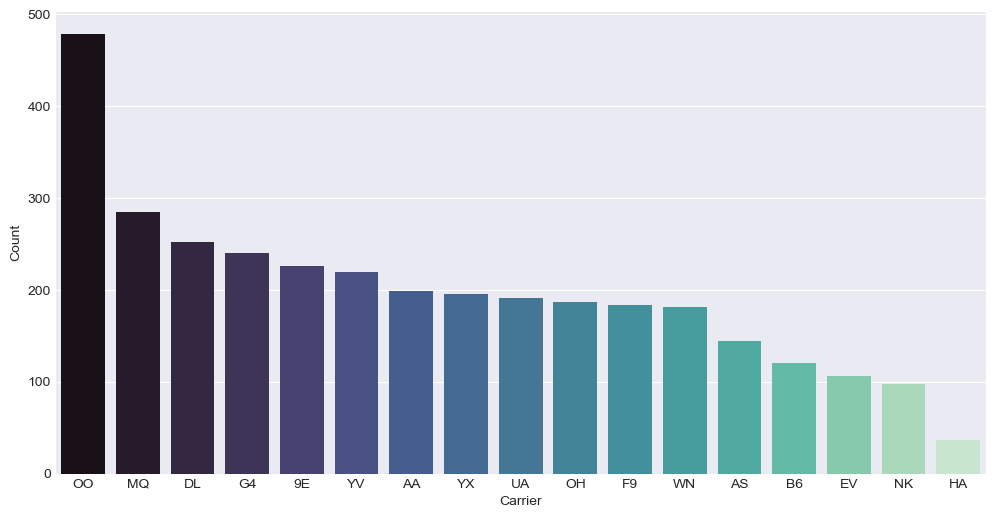

In [23]:
unique_carriers=df["carrier_code"].unique()
print("Unique Crriers",len(unique_carriers))
carrier_count=df["carrier_code"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=carrier_count.index,y=carrier_count.values,palette="mako")
plt.xlabel("Carrier")
plt.ylabel("Count")
plt.show()

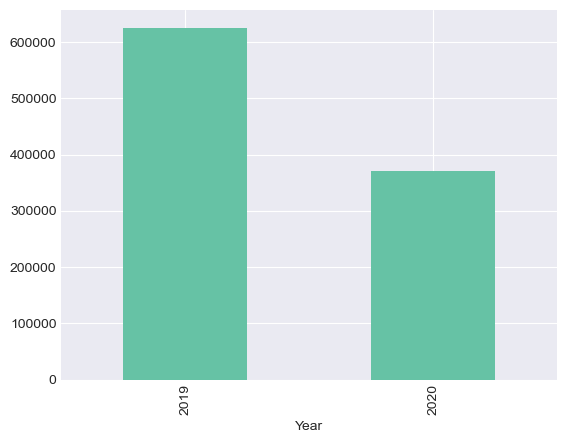

In [24]:
flight=df.groupby(["year"])["arrival_flights"].sum().plot(kind="bar")
plt.xlabel("Year")
plt.show()

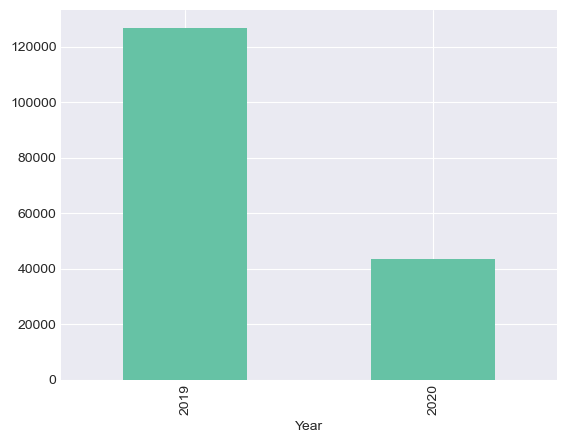

In [25]:
flight=df.groupby(["year"])["arrival_delay_over_15min"].sum().plot(kind="bar")
plt.xlabel("Year")
plt.show()

# Which airline carriers have the highest total number of arriving flights?

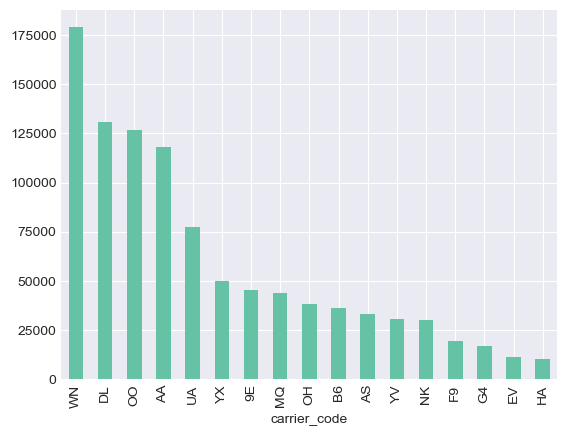

In [26]:
carrier_arrival_count=df.groupby("carrier_code")["arrival_flights"].sum().sort_values(ascending=False).plot(kind="bar")


# Which carriers have the highest number of delayed flights?

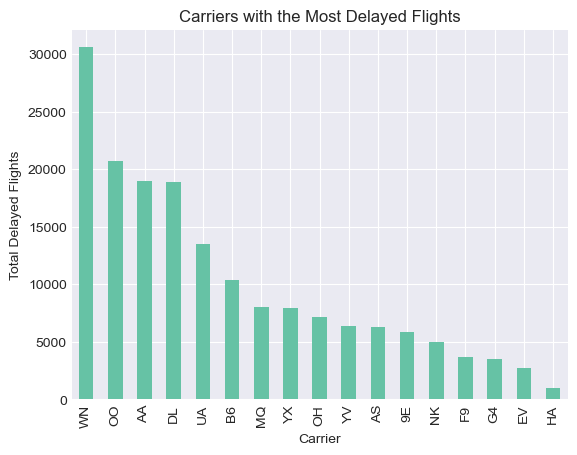

In [27]:
carrier_arrival_count=df.groupby("carrier_code")["arrival_delay_over_15min"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Carriers with the Most Delayed Flights")
plt.xlabel("Carrier")
plt.ylabel("Total Delayed Flights")
plt.show()

In [28]:
carrier_delay_counts=df.groupby("carrier_code")["arrival_delay_over_15min"].sum().sort_values(ascending=False)
top_carrier=carrier_delay_counts.head(5).index
top_carrier_data=df[df["carrier_code"].isin(top_carrier)]
top_carrier_data

,year,month,carrier_code,carrier_name,airport_code,airport_name,arrival_flights,arrival_delay_over_15min,carrier_delay_count,weather_delay_count,...,security_delay_count,late_aircraft_delay_count,arrival_cancelled_count,arrival_diverted_count,total_arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
117,2020,12,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",31.0,6.0,3.06,0.00,...,0.0,1.59,0.0,0.0,160.0,88.0,0.0,36.0,0.0,36.0
118,2020,12,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",373.0,35.0,21.15,0.00,...,1.0,4.75,2.0,0.0,2168.0,1404.0,0.0,462.0,51.0,251.0
119,2020,12,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",380.0,48.0,18.17,0.40,...,0.0,7.87,1.0,1.0,1881.0,675.0,10.0,755.0,0.0,441.0
120,2020,12,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",100.0,10.0,3.15,0.00,...,0.0,1.95,3.0,1.0,354.0,106.0,0.0,130.0,0.0,118.0
121,2020,12,AA,American Airlines Inc.,BNA,"Nashville, TN: Nashville International",319.0,31.0,15.35,0.27,...,0.0,2.62,3.0,1.0,2019.0,963.0,13.0,812.0,0.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2019,12,DL,Delta Air Lines Inc.,TUL,"Tulsa, OK: Tulsa International",86.0,3.0,1.17,0.70,...,0.0,0.83,0.0,0.0,157.0,95.0,16.0,7.0,0.0,39.0
3339,2019,12,DL,Delta Air Lines Inc.,TUS,"Tucson, AZ: Tucson International",90.0,20.0,6.95,1.62,...,0.0,7.39,0.0,0.0,861.0,383.0,55.0,103.0,0.0,320.0
3340,2019,12,DL,Delta Air Lines Inc.,TYS,"Knoxville, TN: McGhee Tyson",77.0,6.0,5.53,0.00,...,0.0,0.00,0.0,0.0,240.0,233.0,0.0,7.0,0.0,0.0
3341,2019,12,DL,Delta Air Lines Inc.,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",152.0,11.0,7.06,0.48,...,0.0,2.33,0.0,0.0,620.0,498.0,13.0,34.0,0.0,75.0


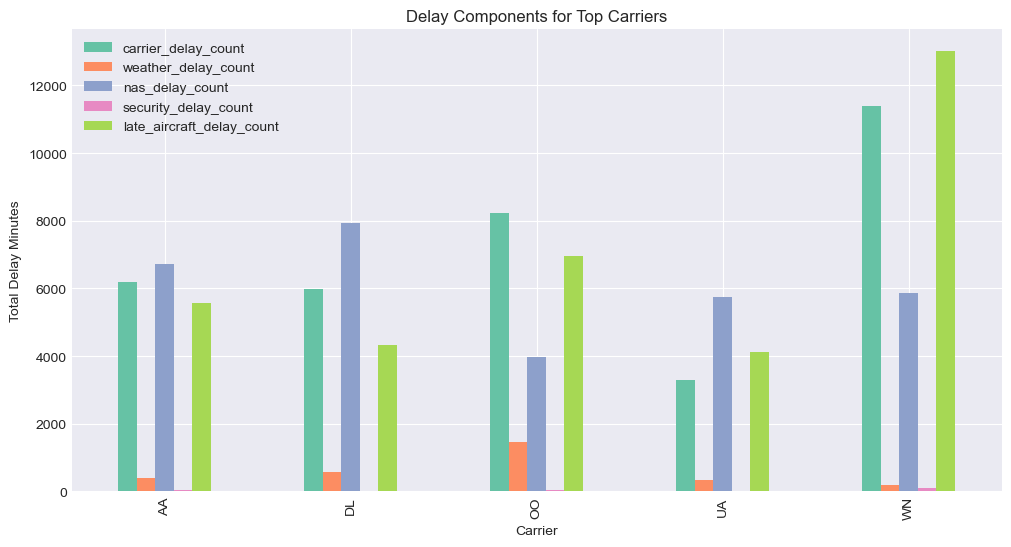

In [29]:
delay_columns=['carrier_delay_count','weather_delay_count','nas_delay_count','security_delay_count','late_aircraft_delay_count']
delay_data=top_carrier_data.groupby("carrier_code")[delay_columns].sum()
delay_data.plot(kind="bar",figsize=(12,6))
plt.title("Delay Components for Top Carriers")
plt.xlabel("Carrier")
plt.ylabel("Total Delay Minutes")
plt.show()

In [30]:
carrier_delay_counts=df.groupby("carrier_code")["arrival_delay_over_15min"].sum().sort_values(ascending=False)
top_carrier=carrier_delay_counts.head(5).index
top_carrier_data=df[df["carrier_code"].isin(top_carrier)]
top_carrier_data

,year,month,carrier_code,carrier_name,airport_code,airport_name,arrival_flights,arrival_delay_over_15min,carrier_delay_count,weather_delay_count,...,security_delay_count,late_aircraft_delay_count,arrival_cancelled_count,arrival_diverted_count,total_arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
117,2020,12,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",31.0,6.0,3.06,0.00,...,0.0,1.59,0.0,0.0,160.0,88.0,0.0,36.0,0.0,36.0
118,2020,12,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",373.0,35.0,21.15,0.00,...,1.0,4.75,2.0,0.0,2168.0,1404.0,0.0,462.0,51.0,251.0
119,2020,12,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",380.0,48.0,18.17,0.40,...,0.0,7.87,1.0,1.0,1881.0,675.0,10.0,755.0,0.0,441.0
120,2020,12,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",100.0,10.0,3.15,0.00,...,0.0,1.95,3.0,1.0,354.0,106.0,0.0,130.0,0.0,118.0
121,2020,12,AA,American Airlines Inc.,BNA,"Nashville, TN: Nashville International",319.0,31.0,15.35,0.27,...,0.0,2.62,3.0,1.0,2019.0,963.0,13.0,812.0,0.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2019,12,DL,Delta Air Lines Inc.,TUL,"Tulsa, OK: Tulsa International",86.0,3.0,1.17,0.70,...,0.0,0.83,0.0,0.0,157.0,95.0,16.0,7.0,0.0,39.0
3339,2019,12,DL,Delta Air Lines Inc.,TUS,"Tucson, AZ: Tucson International",90.0,20.0,6.95,1.62,...,0.0,7.39,0.0,0.0,861.0,383.0,55.0,103.0,0.0,320.0
3340,2019,12,DL,Delta Air Lines Inc.,TYS,"Knoxville, TN: McGhee Tyson",77.0,6.0,5.53,0.00,...,0.0,0.00,0.0,0.0,240.0,233.0,0.0,7.0,0.0,0.0
3341,2019,12,DL,Delta Air Lines Inc.,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",152.0,11.0,7.06,0.48,...,0.0,2.33,0.0,0.0,620.0,498.0,13.0,34.0,0.0,75.0


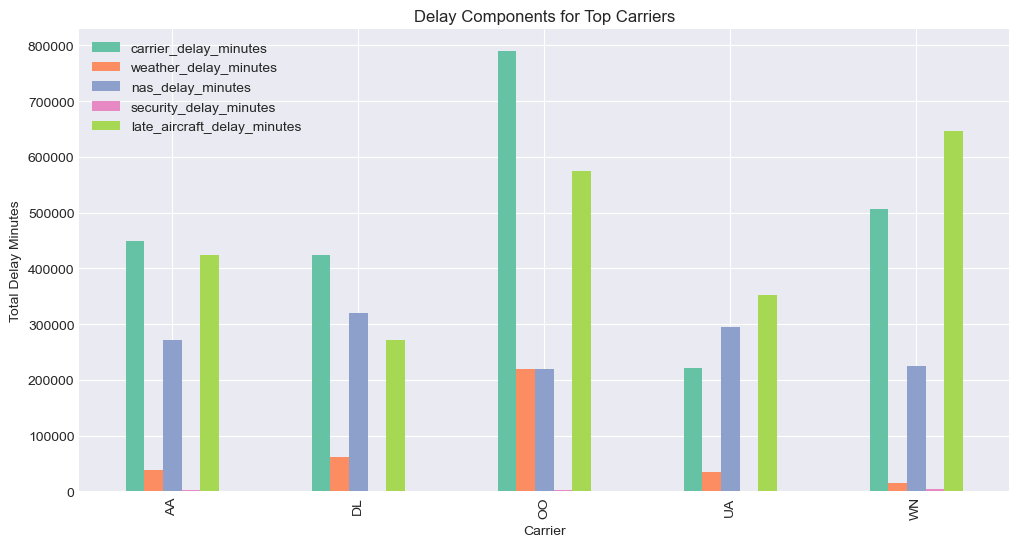

In [31]:
delay_columns=['carrier_delay_minutes','weather_delay_minutes','nas_delay_minutes','security_delay_minutes','late_aircraft_delay_minutes']
delay_data=top_carrier_data.groupby("carrier_code")[delay_columns].sum()
delay_data.plot(kind="bar",figsize=(12,6))
plt.title("Delay Components for Top Carriers")
plt.xlabel("Carrier")
plt.ylabel("Total Delay Minutes")
plt.show()

<Axes: xlabel='carrier_code'>

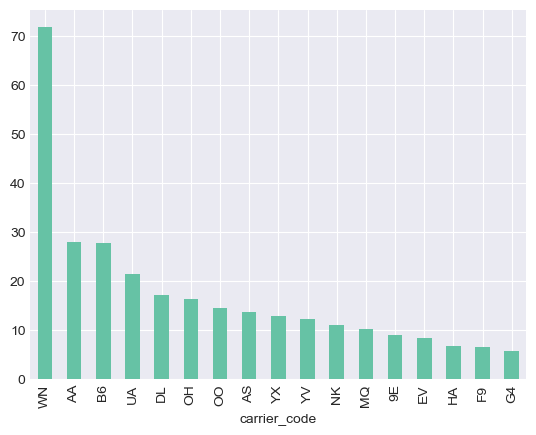

In [32]:
avg_late_aircraft_delay=df.groupby("carrier_code")["late_aircraft_delay_count"].mean().sort_values(ascending=False)
avg_late_aircraft_delay.plot(kind="bar")

<Axes: xlabel='carrier_name'>

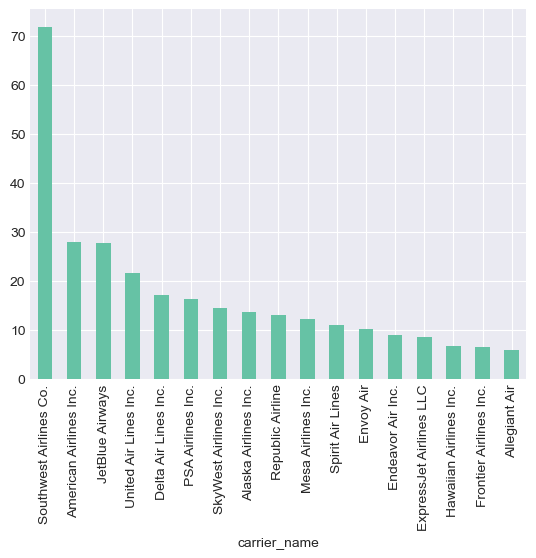

In [33]:
avg_late_aircraft_delay=df.groupby("carrier_name")["late_aircraft_delay_count"].mean().sort_values(ascending=False)
avg_late_aircraft_delay.plot(kind="bar")

# Feature Engineering

In [34]:
df["delay_rate"]=df["arrival_delay_over_15min"]/df["arrival_flights"]
# df["total_delay_count"]=df[['carrier_delay_count','weather_delay_count','nas_delay_count','security_delay_count','late_aircraft_delay_count']].sum(axis=1)

In [35]:
# df[["carrier_name","airport_name","arrival_delay_over_15min","total_arrival_delay_minutes","arrival_flights","arrival_cancelled_count","delay_rate"]]

In [36]:
# df.groupby("carrier_code").agg({"arrival_cancelled_count":"sum"}).sort_values(by="arrival_cancelled_count",ascending=False)

# Drop irrelevant columns

In [37]:
columns_to_drop=[
    'carrier_name',
    'airport_name',
    'month',
    'total_arrival_delay_minutes',
    'carrier_delay_minutes',
    'weather_delay_minutes',
    'nas_delay_minutes',
    'security_delay_minutes',
    'late_aircraft_delay_minutes'
]
df=df.drop(columns=columns_to_drop)

In [38]:
df.columns

Index(['year', 'carrier_code', 'airport_code', 'arrival_flights',
       'arrival_delay_over_15min', 'carrier_delay_count',
       'weather_delay_count', 'nas_delay_count', 'security_delay_count',
       'late_aircraft_delay_count', 'arrival_cancelled_count',
       'arrival_diverted_count', 'delay_rate'],
      dtype='object')

In [39]:
df

,year,carrier_code,airport_code,arrival_flights,arrival_delay_over_15min,carrier_delay_count,weather_delay_count,nas_delay_count,security_delay_count,late_aircraft_delay_count,arrival_cancelled_count,arrival_diverted_count,delay_rate
0,2020,9E,ABE,44.0,3.0,1.63,0.00,0.12,0.0,1.25,0.0,1.0,0.068182
1,2020,9E,ABY,90.0,1.0,0.96,0.00,0.04,0.0,0.00,0.0,0.0,0.011111
2,2020,9E,AEX,88.0,8.0,5.75,0.00,1.60,0.0,0.65,0.0,1.0,0.090909
3,2020,9E,AGS,184.0,9.0,4.17,0.00,1.83,0.0,3.00,0.0,0.0,0.048913
4,2020,9E,ALB,76.0,11.0,4.78,0.00,5.22,0.0,1.00,1.0,0.0,0.144737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,EV,AMA,56.0,8.0,2.20,1.00,3.99,0.0,0.80,0.0,1.0,0.142857
3347,2019,EV,ATL,76.0,17.0,7.51,0.24,4.13,0.0,5.12,0.0,0.0,0.223684
3348,2019,EV,AUS,7.0,1.0,0.00,0.48,0.52,0.0,0.00,0.0,0.0,0.142857
3349,2019,EV,AVL,12.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,0.083333


<Axes: >

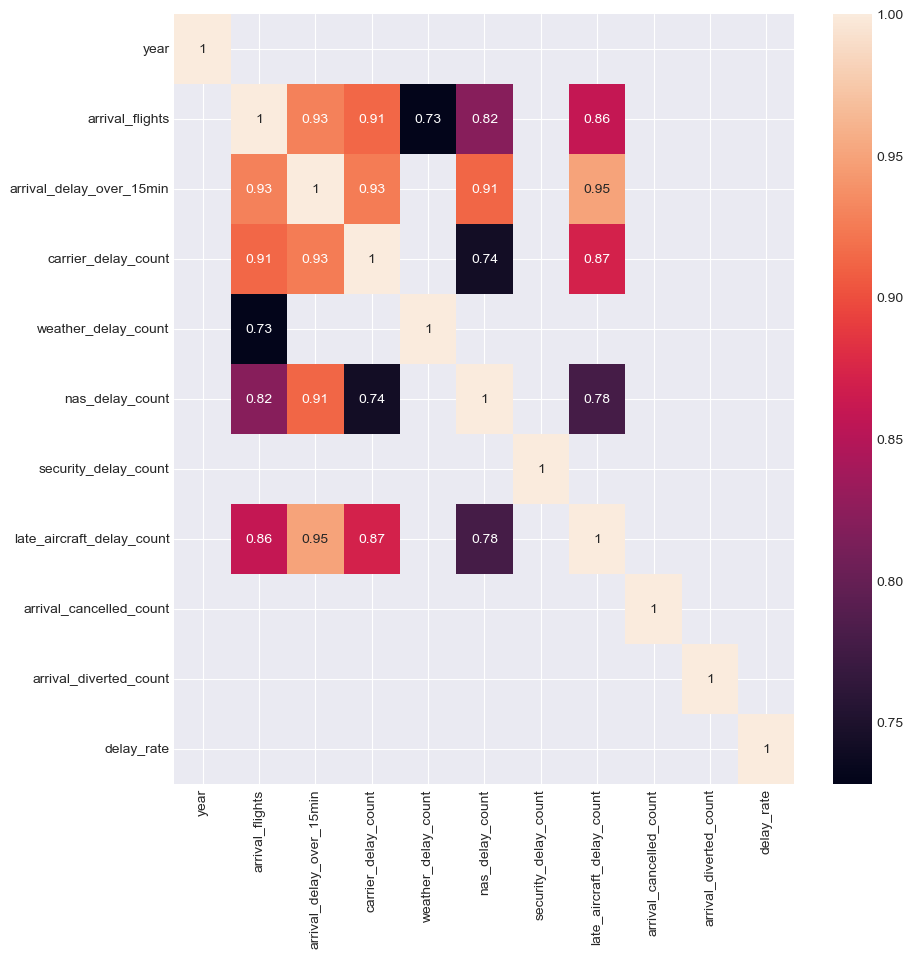

In [40]:
plt.figure(figsize=(10,10))
corr=df.corr(numeric_only=True)
mask=(corr >-0.7) &(corr < 0.7)
sns.heatmap(corr,annot=True,mask=mask)

In [41]:
from sklearn.pipeline import  Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

# Split your data into training and testing sets

In [42]:
X=df.drop(columns="arrival_delay_over_15min")
y=df["arrival_delay_over_15min"]

#  Multicollinearity

In [43]:
corr_matrix=X.corr(numeric_only=True)
upper=np.triu(np.ones(corr_matrix.shape),k=1).astype(bool)
upper_corr=pd.DataFrame(corr_matrix.values,columns=corr_matrix.columns,index=corr_matrix.index)
upper_corr=upper_corr.where(upper)
to_drop=[column for column in upper_corr.columns if any(upper_corr[column]>0.8)]
X=X.drop(columns=to_drop)

In [44]:
numerical_columns=X.select_dtypes(include=["number"]).columns.tolist()
categorical_colums=X.select_dtypes(include=["object"]).columns.tolist()

In [45]:
numerical_columns

['year',
 'arrival_flights',
 'weather_delay_count',
 'security_delay_count',
 'arrival_cancelled_count',
 'arrival_diverted_count',
 'delay_rate']

In [46]:
categorical_colums

['carrier_code', 'airport_code']

In [47]:
categorical_transformer=OneHotEncoder(handle_unknown="ignore")
numreical_transformer=StandardScaler()
precocessor=ColumnTransformer(
    transformers=[
        ("cat",categorical_transformer,categorical_colums),
        ("num",numreical_transformer,numerical_columns)
    ]
)

In [48]:
X.columns

Index(['year', 'carrier_code', 'airport_code', 'arrival_flights',
       'weather_delay_count', 'security_delay_count',
       'arrival_cancelled_count', 'arrival_diverted_count', 'delay_rate'],
      dtype='object')

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [224]:
models={
    "LinerRegression":LinearRegression(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(random_state=42),
}

In [225]:
results={}
for model_name, model in models.items():
  pipeline=Pipeline(steps=[
      ("precocessor",precocessor),
      ("regressor",model)
  ])
  pipeline.fit(X_train,y_train)
  y_test_pred=pipeline.predict(X_test)
  y_train_pred=pipeline.predict(X_train)
  train_mae=mean_absolute_error(y_train,y_train_pred)
  train_r2=r2_score(y_train,y_train_pred)
  test_mae=mean_absolute_error(y_test,y_test_pred)
  test_r2=r2_score(y_test,y_test_pred)
  results[model_name]={
      "Train MAE":train_mae,
      "Test MAE":test_mae,
      "Train R²":train_r2,
      "Test R²":test_r2
  }

In [226]:
for model_name,metrics in results.items():
  print(f"\n{model_name}")
  print("Training Mean Absolute Error (MAE):",metrics["Train MAE"])
  print("Testing Mean Absolute Error (MAE):",metrics["Test MAE"])
  print("Train R²:",metrics["Train R²"])
  print("Test R²:",metrics["Test R²"])


LinerRegression
Training Mean Absolute Error (MAE): 20.725933798102798
Testing Mean Absolute Error (MAE): 20.986511836018856
Train R²: 0.9134422113700373
Test R²: 0.8090223110122966

DecisionTree
Training Mean Absolute Error (MAE): 0.0
Testing Mean Absolute Error (MAE): 3.7623318385650224
Train R²: 1.0
Test R²: 0.9632837055271778

RandomForest
Training Mean Absolute Error (MAE): 1.6520007479431567
Testing Mean Absolute Error (MAE): 1.9263976083707026
Train R²: 0.9928835628428567
Test R²: 0.986886112354987


In [227]:
# LinerRegression
# Training Mean Absolute Error (MAE): 0.0026074939359292714
# Testing Mean Absolute Error (MAE): 0.0029234981500742066
# Train R²: 0.9999999992682865
# Test R²: 0.999999996810664

# DecisionTree
# Training Mean Absolute Error (MAE): 0.0
# Testing Mean Absolute Error (MAE): 4.443946188340807
# Train R²: 1.0
# Test R²: 0.9601096427076129

# RandomForest
# Training Mean Absolute Error (MAE): 1.5395474943904264
# Testing Mean Absolute Error (MAE): 1.905067264573991
# Train R²: 0.9963111835417019
# Test R²: 0.9927199443043029

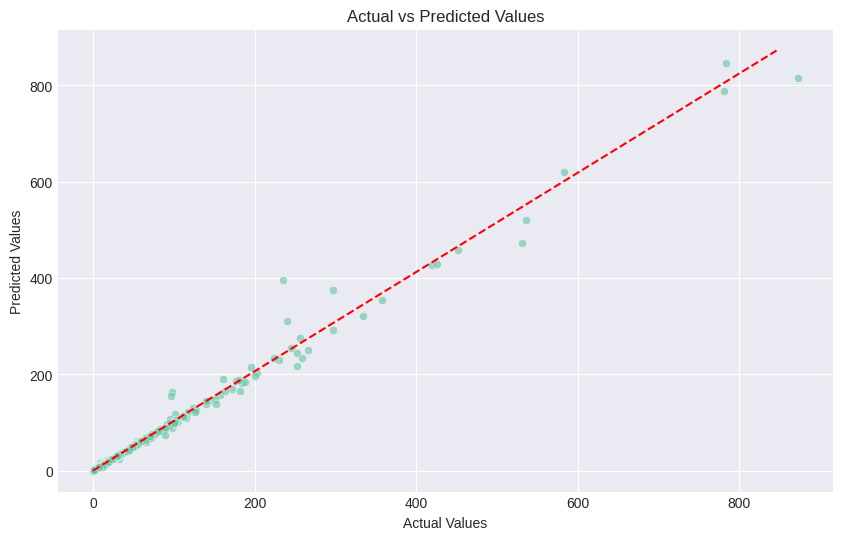

In [228]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test_pred)], [min(y_test_pred), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Model LinerReression

In [229]:
# model=Pipeline(steps=[
#       ("precocessor",precocessor),
#       ("regressor",LinearRegression())
#   ])

In [230]:
# model.fit(X_train,y_train)

In [231]:
# regressor=model.named_steps["regressor"]
# perprocessor=model.named_steps["precocessor"]

In [232]:
# feature_names=perprocessor.get_feature_names_out()

In [233]:
# cofficients=pd.Series(regressor.coef_,index=feature_names)
# cofficients.sort_values(ascending=False)

# Model

In [234]:
model=Pipeline(steps=[
      ("precocessor",precocessor),
      ("regressor",RandomForestRegressor(random_state=42))
  ])

In [235]:
model.fit(X_train,y_train)

Pipeline(steps=[('precocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['carrier_code',
                                                   'airport_code']),
                                                 ('num', StandardScaler(),
                                                  ['year', 'arrival_flights',
                                                   'weather_delay_count',
                                                   'security_delay_count',
                                                   'arrival_cancelled_count',
                                                   'arrival_diverted_count',
                                                   'delay_rate'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [236]:
y_test_pred=pipeline.predict(X_test)
y_train_pred=pipeline.predict(X_train)
train_mae=mean_absolute_error(y_train,y_train_pred)
test_mae=mean_absolute_error(y_test,y_test_pred)
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)

In [237]:
print("Training Mean Absolute Error (MAE):",train_mae)
print("Testing Mean Absolute Error (MAE):",test_mae)
print("Train R²:",train_r2)
print("Test R²:",test_r2)

Training Mean Absolute Error (MAE): 1.6520007479431567
Testing Mean Absolute Error (MAE): 1.9263976083707026
Train R²: 0.9928835628428567
Test R²: 0.986886112354987


# Hyperparameter Tuning in RandomForest

In [238]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={
    "regressor__n_estimators":[100,200,250],
    "regressor__max_depth":[None,5],
     'regressor__min_samples_split': [2, 5]
}
grid_search=RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,verbose=3,random_state=42) # Most detailed output
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=0.983 total time=   3.4s
[CV 2/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=0.957 total time=   3.4s
[CV 3/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=0.942 total time=   4.1s
[CV 4/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=0.948 total time=   3.5s
[CV 5/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100;, score=0.863 total time=   3.4s
[CV 1/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200;, score=0.982 total time=   7.6s
[CV 2/5] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200;, score=0.956 total time=   7.2s
[CV 3/5]

RandomizedSearchCV(estimator=Pipeline(steps=[('precocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['carrier_code',
                                                                                'airport_code']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['year',
                                                                                'arrival_flights',
                                                                                'weather_delay_count',
                                                                                'security_delay_count',
                                                                                'arrival_cancelled_count',
                                                                                'arrival_diverted_count',
                                                                                'delay_rate'])])),
                                             ('regressor',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20,
                   param_distributions={'regressor__max_depth': [None, 5],
                                        'regressor__min_samples_split': [2, 5],
                                        'regressor__n_estimators': [100, 200,
                                                                    250]},
                   random_state=42, verbose=3)

In [240]:
best_rf=grid_search.best_estimator_
print("Best Parameters",grid_search.best_params_)

Best Parameters {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__max_depth': None}


In [241]:
y_test_pred=best_rf.predict(X_test)
y_train_pred=best_rf.predict(X_train)
train_mae=mean_absolute_error(y_train,y_train_pred)
test_mae=mean_absolute_error(y_test,y_test_pred)
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)

In [242]:
print("Training Mean Absolute Error (MAE):",train_mae)
print("Testing Mean Absolute Error (MAE):",test_mae)
print("Train R²:",train_r2)
print("Test R²:",test_r2)

Training Mean Absolute Error (MAE): 1.6520007479431567
Testing Mean Absolute Error (MAE): 1.9263976083707026
Train R²: 0.9928835628428567
Test R²: 0.986886112354987


In [243]:
import joblib
joblib.dump(model,"flight_model.pkl")

['flight_model.pkl']

# 🏆 Next Steps:
## Hyperparameter Tuning: You can enhance this by using GridSearchCV or RandomizedSearchCV to fine-tune hyperparameters for each model.

## Cross-Validation: Consider using cross-validation (cross_val_score) to get more reliable performance metrics.

## Deploy a Regression using Srtreamlit